# A consideration of jpegs and brain images

Now we move to the first major topical transition in our lesson set.  Up until now we have been working with 2-D digital images, but now we will move towards working with [Neuroimaging Informatics Technology Initiative format or "NIfTI"](https://nifti.nimh.nih.gov/) files.  In our exploration of 2-D digital images we covered the following topics:

- How an image data object stores information
- How to make a mask by applying a threshold to image data
- How to align two images
- How to utilize an image parcellation

Note that, despite the 2-D digital image data being stored across three color channels, all of the major tasks were performed using two dimensional data structures.  The data storage component of [NiFTI](https://nifti.nimh.nih.gov/) images is _minimally_ **3** dimensional.  Furthermore, the data contained with a NIfTI represents something quite different than what is represented in JPEG image data (think back to the table comparing data formats).

Let's consider these features in a bit more detail.

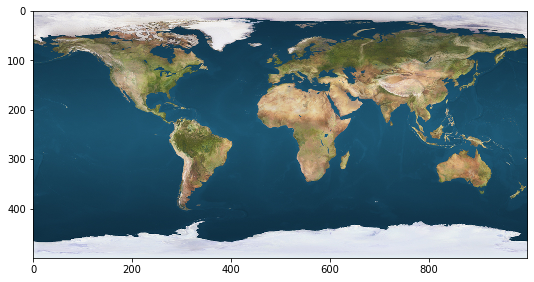

In [2]:
#let's begin by setting up paths and files

#this code ensures that we can navigate the WiMSE repo across multiple systems
import subprocess
import os
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

#get top directory path of the current git repository, under the presumption that 
#the notebook was launched from within the repo directory
gitRepoPath=subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('ascii').strip()

#move to the top of the directory
os.chdir(gitRepoPath)

#file name of standard map of the world
satelliteName='Earthmap1000x500.jpg'

#file name of mri images
mriName='T1t2PD.jpg'

import PIL
from PIL import Image

#get satellite image
satelliteMapPath=os.path.join(gitRepoPath,'images',satelliteName) 
satelliteMap= Image.open(satelliteMapPath)
#in order to display in jupyter, some trickery is necessary
plt.subplot(2, 1, 1)
#%matplotlib inline
imshow(np.asarray(satelliteMap))
fig = plt.gcf()
fig.set_size_inches(15, 10)

In [3]:
from niwidgets import NiftiWidget
from niwidgets import examplet1

#pointing to a different NIfTI, that doesn't have huge spaces between values, so that the colormap is discernible
t1Path=os.path.join(gitRepoPath,'exampleData','t1.nii.gz')

t1_widget = NiftiWidget(t1Path)
t1_widget.nifti_plotter(colormap='gray')

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=90, continuous_update=False, description='x', max=181), IntSlider(value=…

Let's begin our comparison by considering the dimensional differences between the data types.

In the previous lessons we noted that our digital image data was stored in 3 layers corresponding to the RGB values mapped to each image pixel.  Thus, although the picture we viewed was two dimensional, the storage object was 3 dimensional (albeit somewhat shallow, at only three "layers" deep).  The image data component of a NIfTI is (typically, for static and/or structural images) a 3 dimensional structure, but this is not because it is storing color data.  Rather, the image data component of a NIfTI object is (typically) three dimensional because the representation the data is trying to capture is *actually* three dimensional in nature.  The individual image data components, which represent volumes of space and thus constitute [**voxels**](https://en.wikipedia.org/wiki/Voxel) (rather than [pixels](https://en.wikipedia.org/wiki/Pixel)), preserve the spatial relations of the volumes they represent, and so adjacent data entries represent adjacent volumes of space across all three dimensions.  This is in the same way that adjacent pixels in two dimensional digital images represent adjacent regions of a scene.  The data contained in each of these voxel elements represents a characteristic of the volume it corresponds to, but the specific characteristic depends on the MRI scan that generated it, or (in cases of derived or synthetic data) the schema that was used to create the NIfTI data.

As an exercise, we could imagine what it would be like if the NIfTI were to attempt to store something like color data in its object:  our resulting data object would be X by Y by Z by 3 (RGB) color channels in size.  Thus, if a NIfTI were to be storing color information it would  minimally have to be **four** dimensional. However, NIfTIs **are not** storing anything like color information, and so they are typically three dimensional, as in the case of a [T1 image](https://radiopaedia.org/articles/t1-weighted-image?lang=us), or 4 dimensional, as in the case of [fMRI](https://en.wikipedia.org/wiki/Functional_magnetic_resonance_imaging) (functional magnetic resonance imaging) and [DWI](https://en.wikipedia.org/wiki/Diffusion_MRI) (diffusion weighted imaging) data.

Staying on the subject of color for a moment though, we can note that the 2-D digital image is in color while the NIfTI-derived images are grayscaled. This is a consequence of the data being represented by the image. In the case of a digital photo, a camera (of some sort) is used to measure light as it hits a [sensor array](https://en.wikipedia.org/wiki/Image_sensor). The individual sensors are specific (either inherently, or via design features) to specific ranges of wavelengths of [light in the visible range](https://en.wikipedia.org/wiki/Visible_spectrum) (~380-740 nanometers).  Because of this, the sensors are able to collect data about the presented scene in such a way that the same locations are represented multiple times (once for each color channel).  Computer and television screens are then able to recapitulate the scene by passing this stored information to their constituent pixels. Under an [3 value, 8-bit data storage schema for color information](https://en.wikipedia.org/wiki/Color_depth#True_color_(24-bit)), each pixel in each channel can adopt a value between 0 and 255 meaning that basic forms of RGB can display 255^3=16,581,375 distinct colors. Whether or not the human eye can discern this many colors (and the manner in which the color spectrum is *actually* mapped by various [color schemes](https://en.wikipedia.org/wiki/ICC_profile) is another matter entirely. Regardless, this is the general framework by which a digital image stores reflectance information about a scene. 

The manner in which MRI data is depicted by a NIfTI is somewhat different. Like a digital photo--to some extent--the data in a MRI-derived NIfTI is the [result of measuring photons](https://en.wikipedia.org/wiki/Physics_of_magnetic_resonance_imaging).  However the process by which the data from MRI devices is converted into a parsable, three dimensional image is incredibly complex and involves mathematical transformation via [*k-space*](https://en.wikipedia.org/wiki/K-space_(magnetic_resonance_imaging)).  Indeed, the specifics of this process are beyond the scope of this lesson set, and are described in great detail elsewhere (e.g. [Duyn et al., 1998](https://doi.org/10.1006/jmre.1998.1396)).  

Now that we have talked at some length about the NIfTI data structure, let's take a closer look at an example of one.